# Entrenamiento del modelo

## Primera prueba
Esto es la primera version del entrenamiento del modelo (la version final esta mas abajo)

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 📂 Ruta del dataset de la marca (Cambia por cada marca)
file_path = "CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Apple.csv"  # ⚠️ Cambia la ruta al archivo correcto

# 📌 Cargar el dataset
df_marca = pd.read_csv(file_path, sep=";", encoding="latin-1")

# 📊 Definir variables de entrada y salida
X = df_marca.drop(columns=["Fecha", "Precio"])  # Eliminamos columnas innecesarias
y = df_marca["Precio"]

# 📌 Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Entrenar modelo XGBoost con ajustes para evitar sobreestimaciones
modelo_marca = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,  # Más árboles para más precisión
    learning_rate=0.02,  # Aprendizaje más lento para ajustes finos
    max_depth=9,  # Captura mejor los patrones sin sobreajustar
    min_child_weight=1,
    subsample=0.85,
    colsample_bytree=0.9,
    scale_pos_weight=1.3,  # Ajustamos peso de valores bajos
    gamma=1.0,  # Mayor regularización para evitar predicciones altas
    reg_lambda=2.0,  # Regularización L2 para evitar sobreajuste
    reg_alpha=1.0,  # Regularización L1 para controlar valores extremos
    tree_method="gpu_hist",  # Si tienes GPU, usa "gpu_hist"
    random_state=42
)

modelo_marca.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# 📊 Hacer predicciones
y_pred = modelo_marca.predict(X_test)

# 📉 Evaluar el modelo
mae_marca = mean_absolute_error(y_test, y_pred)
rmse_marca = np.sqrt(mean_squared_error(y_test, y_pred))

# 📢 Mostrar resultados
print(f"📊 MAE ({file_path}): {mae_marca:.2f}")
print(f"📊 RMSE ({file_path}): {rmse_marca:.2f}")

# 💾 Guardar el modelo entrenado con el nombre de la marca
marca_nombre = file_path.split("/")[-1].replace("CSV_", "").replace(".csv", "").lower()  # Extraer nombre de la marca
modelo_marca.save_model(f"modelos/modelo_{marca_nombre}.json")
print(f"✅ Modelo guardado como 'modelo_{marca_nombre}.json'")


[0]	validation_0-rmse:135.10864
[1]	validation_0-rmse:132.43873
[2]	validation_0-rmse:131.34672
[3]	validation_0-rmse:128.75078
[4]	validation_0-rmse:126.20689
[5]	validation_0-rmse:123.71675
[6]	validation_0-rmse:122.73884
[7]	validation_0-rmse:120.32061
[8]	validation_0-rmse:117.95080
[9]	validation_0-rmse:115.62532
[10]	validation_0-rmse:113.35002
[11]	validation_0-rmse:111.11832
[12]	validation_0-rmse:108.92850


c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[13]	validation_0-rmse:106.78844
[14]	validation_0-rmse:104.68432
[15]	validation_0-rmse:102.62615
[16]	validation_0-rmse:100.68545
[17]	validation_0-rmse:98.70416
[18]	validation_0-rmse:96.76244
[19]	validation_0-rmse:94.85809
[20]	validation_0-rmse:93.07221
[21]	validation_0-rmse:91.24186
[22]	validation_0-rmse:90.53148
[23]	validation_0-rmse:88.75465
[24]	validation_0-rmse:87.00931
[25]	validation_0-rmse:85.29894
[26]	validation_0-rmse:83.63223
[27]	validation_0-rmse:81.98930
[28]	validation_0-rmse:80.37966
[29]	validation_0-rmse:78.80884
[30]	validation_0-rmse:77.32644
[31]	validation_0-rmse:76.73453
[32]	validation_0-rmse:75.23165
[33]	validation_0-rmse:74.66512
[34]	validation_0-rmse:73.20594
[35]	validation_0-rmse:71.77192
[36]	validation_0-rmse:70.36508
[37]	validation_0-rmse:68.98513
[38]	validation_0-rmse:67.63097
[39]	validation_0-rmse:67.13477
[40]	validation_0-rmse:65.82140
[41]	validation_0-rmse:65.35565
[42]	validation_0-rmse:64.07484
[43]	validation_0-rmse:62.82664
[44]

c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the boost

✅ Modelo guardado como 'modelo_apple.json'


## Version del entrenamiento segunda
Con este script tampoco se entrena bien el modelo, aunque tiene los hiperparametros cambiados para obtener mejores datos de entrenamiento

[0]	validation_0-quantile:27.78208
[1]	validation_0-quantile:27.65700
[2]	validation_0-quantile:27.59538
[3]	validation_0-quantile:27.47327
[4]	validation_0-quantile:27.35127
[5]	validation_0-quantile:27.23296
[6]	validation_0-quantile:27.17685
[7]	validation_0-quantile:27.01791
[8]	validation_0-quantile:26.86069
[9]	validation_0-quantile:26.74468
[10]	validation_0-quantile:26.63059
[11]	validation_0-quantile:26.49464
[12]	validation_0-quantile:26.34628
[13]	validation_0-quantile:26.19866
[14]	validation_0-quantile:26.04430
[15]	validation_0-quantile:25.91649
[16]	validation_0-quantile:25.79057
[17]	validation_0-quantile:25.66603
[18]	validation_0-quantile:25.54530
[19]	validation_0-quantile:25.39891
[20]	validation_0-quantile:25.28089
[21]	validation_0-quantile:25.13014
[22]	validation_0-quantile:25.08745
[23]	validation_0-quantile:24.94651
[24]	validation_0-quantile:24.80827
[25]	validation_0-quantile:24.67178
[26]	validation_0-quantile:24.55597


c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:58:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[27]	validation_0-quantile:24.42382
[28]	validation_0-quantile:24.29427
[29]	validation_0-quantile:24.19626
[30]	validation_0-quantile:24.07174
[31]	validation_0-quantile:24.02823
[32]	validation_0-quantile:23.90063
[33]	validation_0-quantile:23.85944
[34]	validation_0-quantile:23.74264
[35]	validation_0-quantile:23.63200
[36]	validation_0-quantile:23.52271
[37]	validation_0-quantile:23.41539
[38]	validation_0-quantile:23.30842
[39]	validation_0-quantile:23.27476
[40]	validation_0-quantile:23.17043
[41]	validation_0-quantile:23.14143
[42]	validation_0-quantile:23.01543
[43]	validation_0-quantile:22.90182
[44]	validation_0-quantile:22.77912
[45]	validation_0-quantile:22.67389
[46]	validation_0-quantile:22.56330
[47]	validation_0-quantile:22.45827
[48]	validation_0-quantile:22.43430
[49]	validation_0-quantile:22.32698
[50]	validation_0-quantile:22.18881
[51]	validation_0-quantile:22.16181
[52]	validation_0-quantile:22.14772
[53]	validation_0-quantile:22.04069
[54]	validation_0-quantile:2

c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:58:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


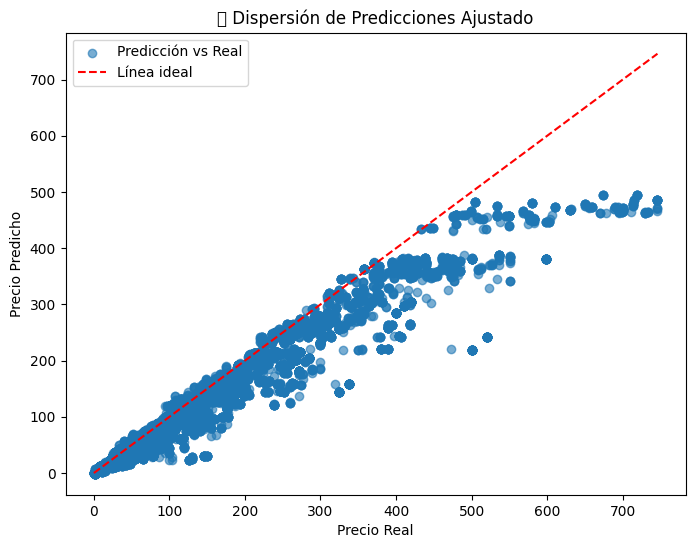

✅ Modelo guardado como 'modelo_apple.json'


In [6]:
# Prueba de finetuning de hiperparámetros

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 📂 Ruta del dataset de la marca (Cambia por cada marca)
file_path = "CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Apple.csv"  # ⚠️ Cambia la ruta al archivo correcto

# 📌 Cargar el dataset
df_marca = pd.read_csv(file_path, sep=";", encoding="latin-1")

# 📊 Definir variables de entrada y salida (Sin modificar fecha_lanzamiento)
X = df_marca.drop(columns=["Fecha", "Precio"])
y = df_marca["Precio"]

# 📌 Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Entrenar modelo XGBoost con `quantile loss` para mejorar precios bajos
modelo_marca = xgb.XGBRegressor(
    objective="reg:quantileerror",  # 🔹 Optimización de cuantil
    quantile_alpha=0.25,  # 🔹 Volvemos al mejor ajuste
    n_estimators=550,  # 🔹 Ajustamos el número de árboles
    learning_rate=0.012,  # 🔹 Ajustes finos sin cambios bruscos
    max_depth=5,  # 🔹 Mantenemos la profundidad óptima
    min_child_weight=4,  # 🔹 Evita sobreestimaciones en valores bajos
    subsample=0.85,
    colsample_bytree=0.9,
    gamma=8.0,  # 🔹 Ajustamos la penalización de valores extremos
    reg_lambda=6.0,  # 🔹 Mantiene flexibilidad en precios altos
    reg_alpha=2.5,
    tree_method="gpu_hist",
    random_state=42
)

modelo_marca.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# 📊 Hacer predicciones
y_pred = modelo_marca.predict(X_test)

# 📉 Evaluar el modelo
mae_marca = mean_absolute_error(y_test, y_pred)
rmse_marca = np.sqrt(mean_squared_error(y_test, y_pred))

# 📢 Mostrar resultados
print(f"📊 MAE ({file_path}): {mae_marca:.2f}")
print(f"📊 RMSE ({file_path}): {rmse_marca:.2f}")

# 🚀 Visualizar Dispersión de Predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicción vs Real")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Línea ideal")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("📊 Dispersión de Predicciones Ajustado")
plt.legend()
plt.show()

# 💾 Guardar el modelo entrenado con el nombre de la marca
marca_nombre = file_path.split("/")[-1].replace("CSV_", "").replace(".csv", "").lower()
modelo_marca.save_model(f"modelos/modelo_{marca_nombre}.json")
print(f"✅ Modelo guardado como 'modelo_{marca_nombre}.json'")



# Aqui se prueba el modelo introduciendo datos para hacer una predicción.

In [4]:
import pandas as pd
import xgboost as xgb
import numpy as np
from datetime import datetime, timedelta

# 📂 Cargar el diccionario de modelos
df_modelo_REF = pd.read_csv("CSV_transformaciones/CSVs_trade_in/Modelo_REF.csv", sep=";", encoding="latin-1")
modelo_to_num = df_modelo_REF.set_index("Modelo")["Modelo_NUM"].to_dict()

# 📂 Cargar fechas de lanzamiento
fechas_lanzamiento = pd.read_csv("CSV_transformaciones/CSVs_trade_in/fechas_lanzamiento.csv", sep=";", encoding="latin-1", parse_dates=["Fecha de Lanzamiento"])
fechas_lanzamiento_dict = fechas_lanzamiento.set_index("Modelo")["Fecha de Lanzamiento"].to_dict()

# 📂 Lista de marcas disponibles con sus modelos entrenados
marcas_disponibles = [
    "apple", "google", "honor", "huawei", "motorola", "oneplus", "oppo", "samsung", "xiaomi"
]
modelos_especificos = {marca: f"modelos/modelo_{marca}.bin" for marca in marcas_disponibles}

# ✅ Función para cargar modelos según la marca
def cargar_modelo(marca):
    if marca in modelos_especificos:
        modelo = xgb.XGBRegressor()
        modelo.load_model(modelos_especificos[marca])
        return modelo
    else:
        print("⚠️ No hay modelo entrenado para esta marca.")
        return None

# ✅ Función para hacer predicciones
def predecir_precio(modelo, datos):
    datos_array = np.array([datos], dtype=np.float32)
    prediccion = modelo.predict(datos_array)
    return prediccion[0]

# 📝 Solicitar datos al usuario
marca_texto = input("🏷️ Introduce la marca del dispositivo: ").strip().lower()
modelo_texto = input("📱 Introduce el modelo (nombre exacto): ").strip()
almacenamiento = int(input("💾 Introduce el almacenamiento (GB): "))
grado = int(input("🔍 Introduce el grado (estado del dispositivo): "))

# 🔄 Convertir el modelo a número
modelo = modelo_to_num.get(modelo_texto, None)

if modelo is None:
    print("⚠️ El modelo introducido no existe en el diccionario. Verifica el nombre.")
elif marca_texto not in marcas_disponibles:
    print("⚠️ La marca introducida no tiene un modelo entrenado.")
else:
    # 🕒 Calcular fecha de lanzamiento y otros atributos
    now = datetime.now()
    dia_semana = now.weekday()
    mes = now.month
    dia_año = now.timetuple().tm_yday
    # dias_desde_inicio = (now - datetime(2024, 2, 1)).days

    # 📅 Calcular la fecha de lanzamiento en días
    fecha_lanzamiento = (now - fechas_lanzamiento_dict.get(modelo_texto, now)).days

    # 📂 Cargar el modelo específico de la marca
    modelo_entrenado = cargar_modelo(marca_texto)

    if modelo_entrenado:
        # 📊 Crear los datos de entrada
        nuevos_datos = np.array([modelo, almacenamiento, fecha_lanzamiento, grado], dtype=np.float32)
        prediccion = predecir_precio(modelo_entrenado, nuevos_datos)
        print(f"📢 Predicción de precio ({marca_texto.upper()}): {prediccion:.2f} €")
        print(f"Debug - Input values: Model={modelo}, Storage={almacenamiento}, Days since launch={fecha_lanzamiento}, Grade={grado}")


📢 Predicción de precio (APPLE): 200.18 €
Debug - Input values: Model=22, Storage=256, Days since launch=1614, Grade=4


# Pruebas para comprobar si hay over fitting o underfitting en el modelo entrenado

📊 MAE Train: 0.59 | MAE Test: 0.61
📊 RMSE Train: 1.00 | RMSE Test: 1.04


c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


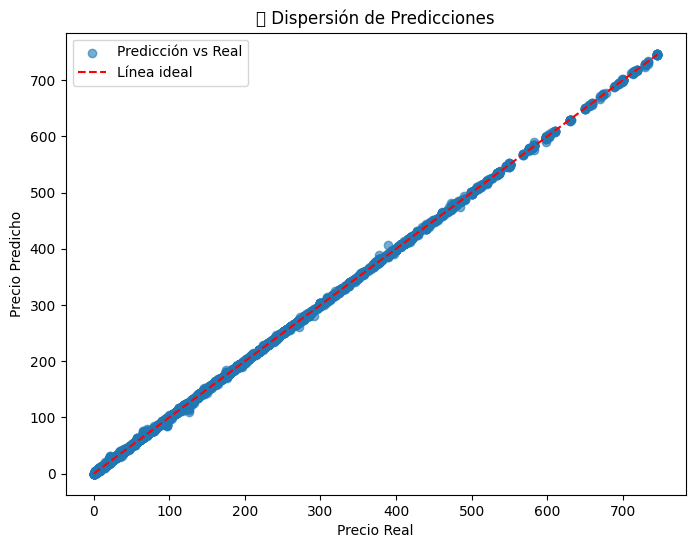

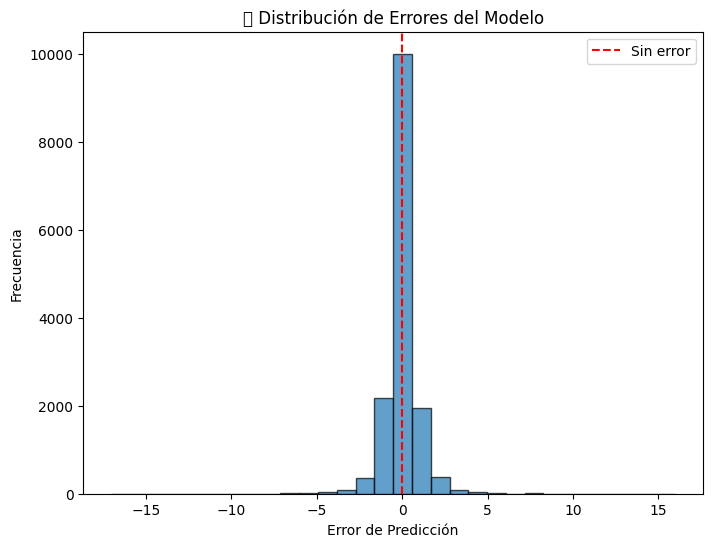

In [22]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 📂 Ruta del dataset de la marca (Cambia por cada marca)
file_path = "CSV_transformaciones\CSVs_trade_in\CSVs_Marcas\CSV_Apple.csv"  # ⚠️ Cambia por el dataset de Apple u otra marca

# 📌 Cargar el dataset
df_marca = pd.read_csv(file_path, sep=";", encoding="latin-1")

# 📊 Definir variables de entrada y salida
X = df_marca.drop(columns=["Fecha", "Precio"])
y = df_marca["Precio"]

# 📌 Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Cargar el modelo entrenado
modelo = xgb.XGBRegressor()
modelo.load_model("modelos/modelo_apple.json")  # ⚠️ Cambia al modelo que quieres analizar

# 📊 Evaluar en Train
y_train_pred = modelo.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 📊 Evaluar en Test
y_test_pred = modelo.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 📢 Mostrar resultados
print(f"📊 MAE Train: {mae_train:.2f} | MAE Test: {mae_test:.2f}")
print(f"📊 RMSE Train: {rmse_train:.2f} | RMSE Test: {rmse_test:.2f}")

# 🚀 Visualizar dispersión de predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicción vs Real")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Línea ideal")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("📊 Dispersión de Predicciones")
plt.legend()
plt.show()

# 🚀 Visualizar el Histograma de Errores
errores = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=30, edgecolor="black", alpha=0.7)
plt.axvline(0, color='red', linestyle="dashed", label="Sin error")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("📊 Distribución de Errores del Modelo")
plt.legend()
plt.show()


# Version Final
## Version para apple
Ya que tiene muchos mas datos que el resto de marcas, lo entrenamos de forma distinta.

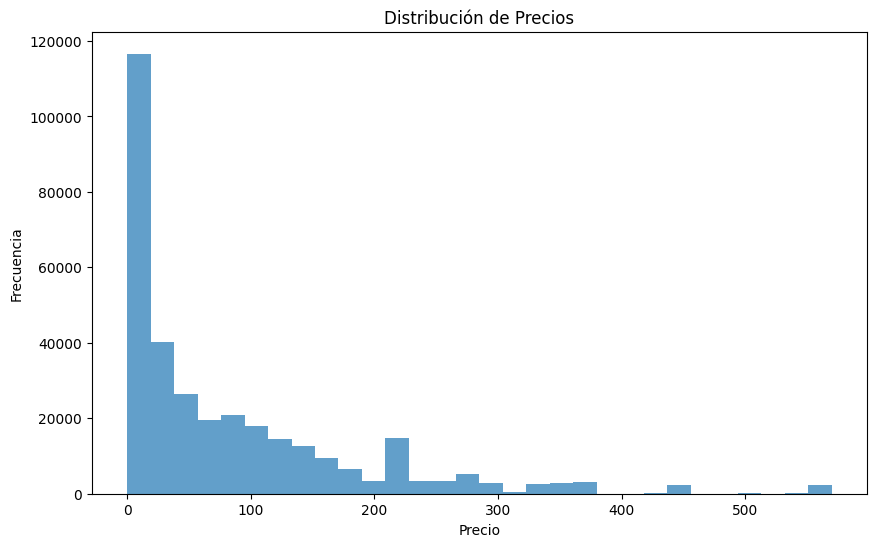

[0]	validation_0-rmse:100.43969	validation_1-rmse:100.46688


c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:31.14075	validation_1-rmse:31.21514
[200]	validation_0-rmse:12.66701	validation_1-rmse:12.81133
[300]	validation_0-rmse:8.02149	validation_1-rmse:8.23007
[400]	validation_0-rmse:6.78095	validation_1-rmse:7.03772
[500]	validation_0-rmse:6.33619	validation_1-rmse:6.62320
[600]	validation_0-rmse:6.12650	validation_1-rmse:6.44204
[700]	validation_0-rmse:5.96711	validation_1-rmse:6.30680
[800]	validation_0-rmse:5.88649	validation_1-rmse:6.23678
[900]	validation_0-rmse:5.82449	validation_1-rmse:6.18614
[1000]	validation_0-rmse:5.77771	validation_1-rmse:6.14998
[1100]	validation_0-rmse:5.74189	validation_1-rmse:6.11881
[1200]	validation_0-rmse:5.71164	validation_1-rmse:6.10011
[1300]	validation_0-rmse:5.68430	validation_1-rmse:6.07674
[1400]	validation_0-rmse:5.66525	validation_1-rmse:6.05917
[1500]	validation_0-rmse:5.64546	validation_1-rmse:6.04414
[1600]	validation_0-rmse:5.62543	validation_1-rmse:6.02412
[1700]	validation_0-rmse:5.60818	validation_1-rmse:6.01205
[1

c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


📊 MAE (CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Samsung.csv): 1.11
📊 RMSE (CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Samsung.csv): 5.92
📊 R² Score: 0.9966


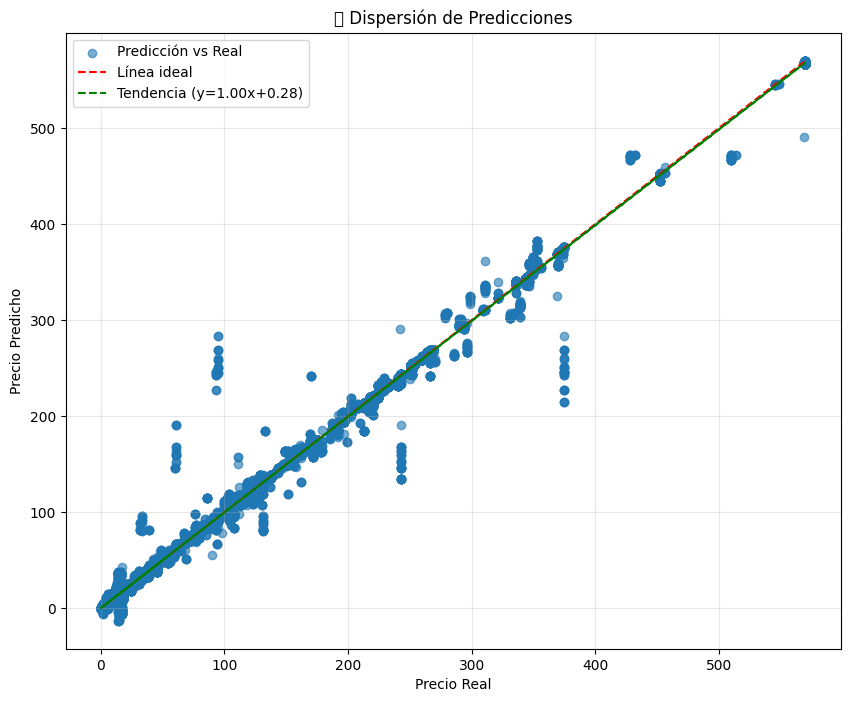

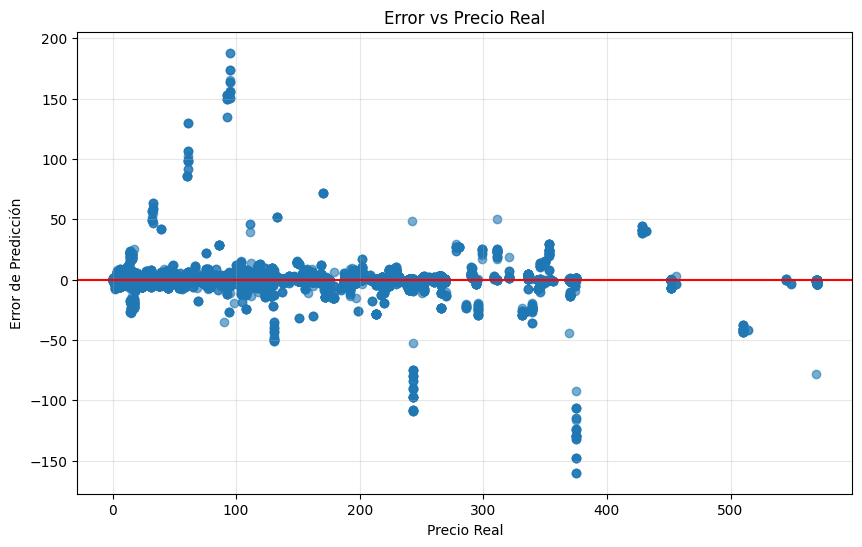

✅ Modelo guardado como 'modelo_samsung.bin'


c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [11]:
# Mejorado para resolver problemas de predicción en precios altos y bajos

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 📂 Ruta del dataset de la marca
file_path = "CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Xiaomi.csv"

# 📌 Cargar el dataset
df_marca = pd.read_csv(file_path, sep=";", encoding="latin-1")

# 📌 Convertir la columna 'Fecha' a formato datetime
#df_marca["Fecha"] = pd.to_datetime(df_marca["Fecha"], format="%Y-%m-%d")

# 📉 Crear una nueva variable: días desde la primera fecha registrada
#df_marca["Dias_desde_inicio"] = (df_marca["Fecha"] - df_marca["Fecha"].min()).dt.days

# Aplicar transformación logarítmica
#df_marca["Dias_desde_inicio_log"] = np.log1p(df_marca["Dias_desde_inicio"])

# 📊 Definir variables de entrada y salida
X = df_marca.drop(columns=["Fecha", "Precio", "Dia_año", "dia_semana", "mes"])
y = df_marca["Precio"]

# 📊 Visualizar distribución de precios antes de entrenar
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, alpha=0.7)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# 📌 Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, 10, duplicates='drop', labels=False))

# 🔄 Escalar características para mejorar la predicción
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 🚀 Modelo XGBoost mejorado para equilibrar predicciones altas y bajas
# Configuración del modelo XGBoost con parámetros optimizados
modelo_marca = xgb.XGBRegressor(
    objective="reg:squarederror",  # Función de pérdida para problemas de regresión
    n_estimators=3000,             # Número total de árboles en el modelo
    learning_rate=0.015,           # Tasa de aprendizaje pequeña para ajuste fino
    max_depth=9,                   # Profundidad máxima de cada árbol
    min_child_weight=2,            # Mínima suma de pesos necesaria en un nodo hijo
    subsample=0.8,                 # Fracción de muestras usadas en cada árbol (previene sobreajuste)
    colsample_bytree=0.85,         # Fracción de columnas usadas por cada árbol
    early_stopping_rounds=50,      # Parar entrenamiento si no hay mejora en 50 rondas
    gamma=0.5,                     # Reducción mínima de pérdida para hacer una partición
    reg_lambda=3,                  # Regularización L2
    reg_alpha=1.5,                 # Regularización L1 para modelos más parsimoniosos
    max_delta_step=2,              # Mejora estabilidad para datos desbalanceados
    scale_pos_weight=0.8,          # Balance para clases (precios) desproporcionadas
    tree_method="gpu_hist",        # Usa GPU para acelerar el entrenamiento si está disponible
    random_state=42                # Semilla para reproducibilidad de resultados
)

# 🔍 Uso de early_stopping para encontrar número óptimo de rondas
eval_set = [(X_train, y_train), (X_test, y_test)]
modelo_marca.fit(
    X_train, y_train, 
    eval_set=eval_set,
    verbose=100,
)

# 📊 Hacer predicciones
y_pred = modelo_marca.predict(X_test)

# 📉 Evaluar el modelo
mae_marca = mean_absolute_error(y_test, y_pred)
rmse_marca = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 📢 Mostrar resultados detallados
print(f"📊 MAE ({file_path}): {mae_marca:.2f}")
print(f"📊 RMSE ({file_path}): {rmse_marca:.2f}")
print(f"📊 R² Score: {r2:.4f}")

# 🎯 Evaluar por rangos de precio
low_mask = y_test < y_test.quantile(0.25)
mid_mask = (y_test >= y_test.quantile(0.25)) & (y_test <= y_test.quantile(0.75))
high_mask = y_test > y_test.quantile(0.75)

# print(f"\n📉 Error en precios bajos (MAE): {mean_absolute_error(y_test[low_mask], y_pred[low_mask]):.2f}")
# print(f"📉 Error en precios medios (MAE): {mean_absolute_error(y_test[mid_mask], y_pred[mid_mask]):.2f}")
# print(f"📉 Error en precios altos (MAE): {mean_absolute_error(y_test[high_mask], y_pred[high_mask]):.2f}")

# 🚀 Visualizar Dispersión de Predicciones mejorado
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicción vs Real")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Línea ideal")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("📊 Dispersión de Predicciones")

# Añadir líneas de regresión para ver tendencias
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "g--", label=f"Tendencia (y={z[0]:.2f}x+{z[1]:.2f})")

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 📊 Visualizar errores por rango de precio
plt.figure(figsize=(10, 6))
error = y_pred - y_test
plt.scatter(y_test, error, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Precio Real")
plt.ylabel("Error de Predicción")
plt.title("Error vs Precio Real")
plt.grid(True, alpha=0.3)
plt.show()

# 💾 Guardar el modelo entrenado con el nombre de la marca
marca_nombre = file_path.split("/")[-1].replace("CSV_", "").replace(".csv", "").lower()
modelo_marca.save_model(f"modelos/modelo_{marca_nombre}.bin")
print(f"✅ Modelo guardado como 'modelo_{marca_nombre}.bin'")

# Guardar también el scaler para futuras predicciones
# import pickle
# with open(f"modelos/scaler_{marca_nombre}.pkl", "wb") as f:
#     pickle.dump(scaler, f)
# print(f"✅ Scaler guardado como 'scaler_{marca_nombre}.pkl'")

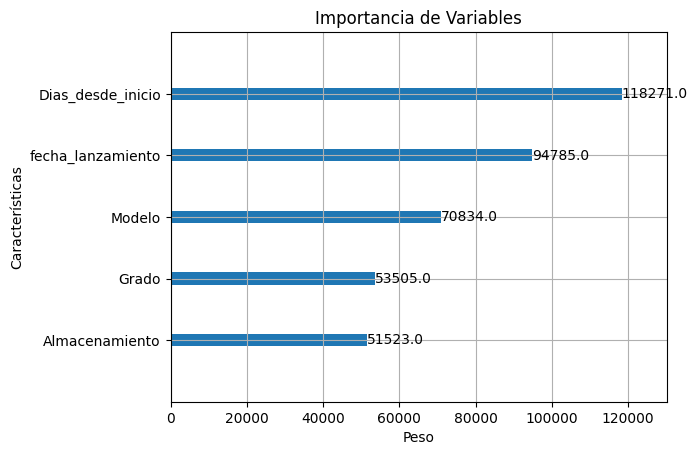

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Obtener importancia de cada variable
xgb.plot_importance(modelo_marca, importance_type="weight", title="Importancia de Variables", xlabel="Peso", ylabel="Características")
plt.show()

### Ahora preparamos una configuracion para otras marcas

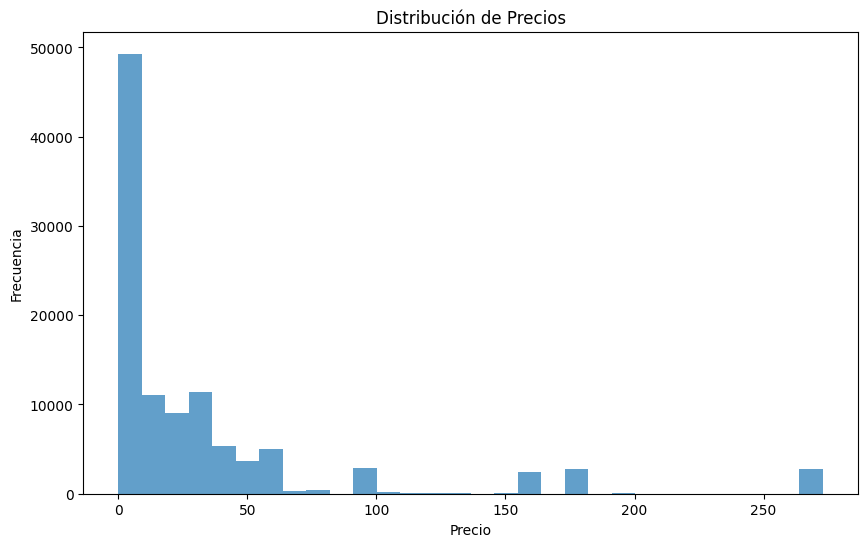

[0]	validation_0-rmse:54.99753	validation_1-rmse:54.29563


c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:36.77042	validation_1-rmse:36.29761
[200]	validation_0-rmse:25.22920	validation_1-rmse:24.93650
[300]	validation_0-rmse:16.93454	validation_1-rmse:16.77386
[400]	validation_0-rmse:12.03628	validation_1-rmse:11.97030
[500]	validation_0-rmse:8.21074	validation_1-rmse:8.21717
[600]	validation_0-rmse:5.93216	validation_1-rmse:5.99860
[700]	validation_0-rmse:4.36408	validation_1-rmse:4.48226
[800]	validation_0-rmse:3.33116	validation_1-rmse:3.49445
[900]	validation_0-rmse:2.77674	validation_1-rmse:2.97483
[1000]	validation_0-rmse:2.44904	validation_1-rmse:2.67127
[1100]	validation_0-rmse:2.26725	validation_1-rmse:2.50760
[1200]	validation_0-rmse:2.16672	validation_1-rmse:2.42045
[1300]	validation_0-rmse:2.10709	validation_1-rmse:2.37457
[1400]	validation_0-rmse:2.07836	validation_1-rmse:2.36055
[1500]	validation_0-rmse:2.06023	validation_1-rmse:2.35863
[1556]	validation_0-rmse:2.05259	validation_1-rmse:2.36066


c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:35:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\Usuario\Desktop\TFM_limpio\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


📊 MAE (CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Xiaomi.csv): 0.43
📊 RMSE (CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Xiaomi.csv): 2.36
📊 R² Score: 0.9981

📉 Error en precios bajos (MAE): 0.17
📉 Error en precios medios (MAE): 0.26
📉 Error en precios altos (MAE): 1.06


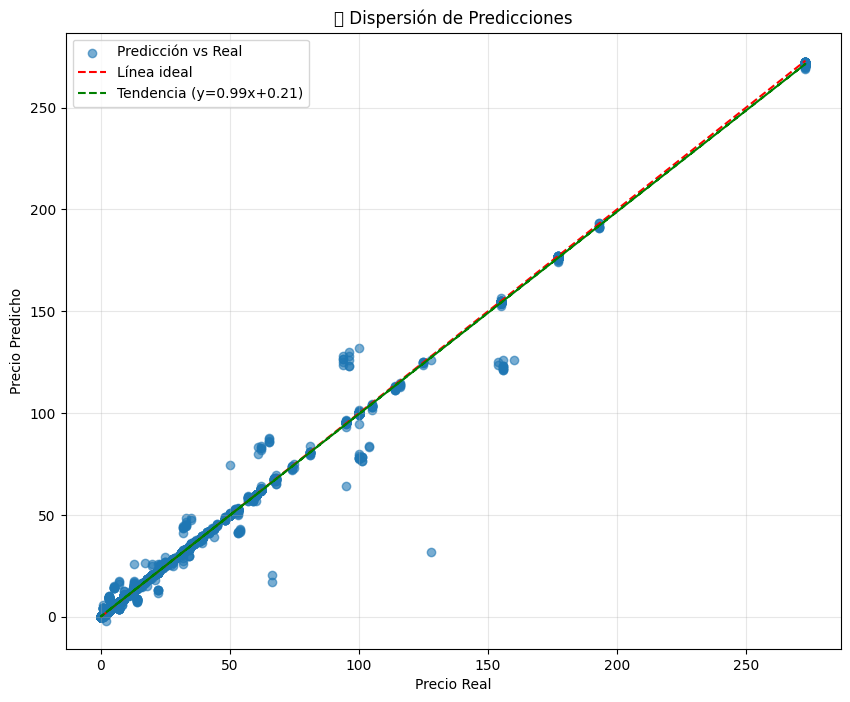

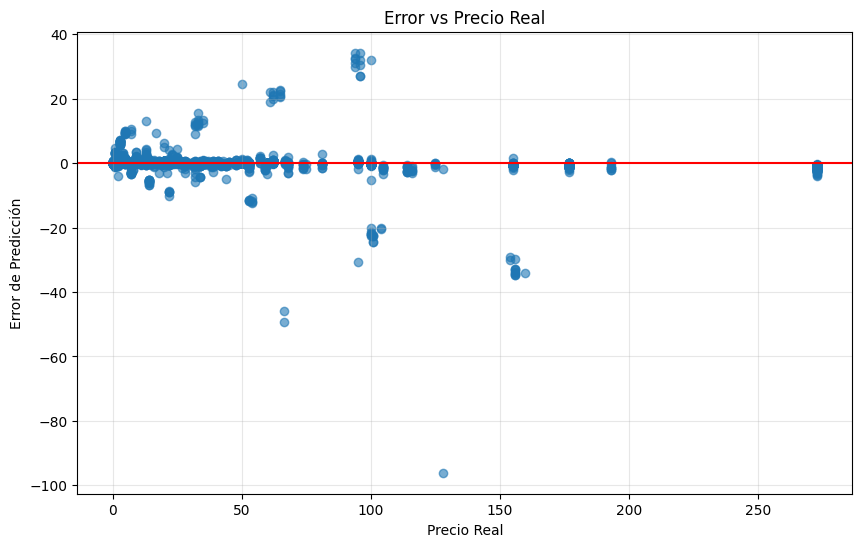

✅ Modelo guardado como 'modelo_xiaomi.json'


In [5]:
# Mejorado para resolver problemas de predicción en precios altos y bajos

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 📂 Ruta del dataset de la marca
file_path = "CSV_transformaciones/CSVs_trade_in/CSVs_Marcas/CSV_Xiaomi.csv"

# 📌 Cargar el dataset
df_marca = pd.read_csv(file_path, sep=";", encoding="latin-1")

# 📊 Definir variables de entrada y salida
X = df_marca.drop(columns=["Fecha", "Precio"])
y = df_marca["Precio"]

# 📊 Visualizar distribución de precios antes de entrenar
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, alpha=0.7)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# 📌 Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=pd.qcut(y, 10, duplicates='drop', labels=False))

# 🔄 Escalar características para mejorar la predicción
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 🚀 Modelo XGBoost mejorado para equilibrar predicciones altas y bajas
# Try these parameter adjustments
modelo_marca = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=5000,             # Más árboles con early stopping
    learning_rate=0.005,           # Tasa de aprendizaje más baja
    max_depth=9,                   # Profundidad más controlada para evitar sobreajuste
    min_child_weight=2,            # Aumentado para mejor generalización
    subsample=0.8,                 # Muestreo aleatorio de datos
    colsample_bytree=0.8,          # Muestreo aleatorio de características
    early_stopping_rounds=100,     # Mayor paciencia para early stopping
    gamma=0.1,                     # Reducido para ser menos estricto
    reg_lambda=1.0,                # Regularización L2
    reg_alpha=0.7,                 # Regularización L1
    max_delta_step=0.8,            # Ayuda con clases desbalanceadas
    tree_method="gpu_hist",        # Usar GPU si está disponible
    random_state=42
)

# 🔍 Uso de early_stopping para encontrar número óptimo de rondas
eval_set = [(X_train, y_train), (X_test, y_test)]
modelo_marca.fit(
    X_train, y_train, 
    eval_set=eval_set,
    verbose=100,
)

# 📊 Hacer predicciones
y_pred = modelo_marca.predict(X_test)

# 📉 Evaluar el modelo
mae_marca = mean_absolute_error(y_test, y_pred)
rmse_marca = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 📢 Mostrar resultados detallados
print(f"📊 MAE ({file_path}): {mae_marca:.2f}")
print(f"📊 RMSE ({file_path}): {rmse_marca:.2f}")
print(f"📊 R² Score: {r2:.4f}")

# 🎯 Evaluar por rangos de precio
low_mask = y_test < y_test.quantile(0.25)
mid_mask = (y_test >= y_test.quantile(0.25)) & (y_test <= y_test.quantile(0.75))
high_mask = y_test > y_test.quantile(0.75)

print(f"\n📉 Error en precios bajos (MAE): {mean_absolute_error(y_test[low_mask], y_pred[low_mask]):.2f}")
print(f"📉 Error en precios medios (MAE): {mean_absolute_error(y_test[mid_mask], y_pred[mid_mask]):.2f}")
print(f"📉 Error en precios altos (MAE): {mean_absolute_error(y_test[high_mask], y_pred[high_mask]):.2f}")

# 🚀 Visualizar Dispersión de Predicciones mejorado
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicción vs Real")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Línea ideal")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("📊 Dispersión de Predicciones")

# Añadir líneas de regresión para ver tendencias
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "g--", label=f"Tendencia (y={z[0]:.2f}x+{z[1]:.2f})")

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 📊 Visualizar errores por rango de precio
plt.figure(figsize=(10, 6))
error = y_pred - y_test
plt.scatter(y_test, error, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Precio Real")
plt.ylabel("Error de Predicción")
plt.title("Error vs Precio Real")
plt.grid(True, alpha=0.3)
plt.show()

# 💾 Guardar el modelo entrenado con el nombre de la marca
marca_nombre = file_path.split("/")[-1].replace("CSV_", "").replace(".csv", "").lower()
modelo_marca.save_model(f"modelos/modelo_{marca_nombre}_falso.json")
print(f"✅ Modelo guardado como 'modelo_{marca_nombre}.json'")